# West Nile
### Starter Code

In [43]:
# Original code: Beating the Benchmark from West Nile Virus Prediction @ Kaggle by Abhihsek
# Modified by Brendan Lane
import pandas as pd
import numpy as np
from sklearn import ensemble, preprocessing
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load dataset 
train = pd.read_csv('../assets/train.csv')
test = pd.read_csv('../assets/test.csv')
sample = pd.read_csv('../assets/sampleSubmission.csv')
weather = pd.read_csv('../assets/clean_weather.csv')
spray = pd.read_csv('../assets/spray.csv')

In [3]:
spray = spray.drop_duplicates()
train = train.drop_duplicates()

In [4]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [5]:
# Output
y = train.WnvPresent.values

In [6]:
# ! We may want to include codesum in final model
# ! Refer to pdf in 'assets' for codesum information

# Not using codesum for this benchmark
wx = weather.drop('CodeSum', axis=1)

In [7]:
wx.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83.0,50.0,67.0,14,51,56.0,0.0,2.0,...,448.0,0.0,M,0.0,0.0,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84.0,52.0,68.0,M,51,57.0,0.0,3.0,...,448.0,0.0,M,0.0,0.0,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59.0,42.0,51.0,-3,42,47.0,14.0,0.0,...,447.0,0.0,M,0.0,0.0,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60.0,43.0,52.0,M,42,47.0,13.0,0.0,...,447.0,0.0,M,0.0,0.0,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66.0,46.0,56.0,2,40,48.0,9.0,0.0,...,446.0,0.0,M,0.0,0.0,29.39,30.12,11.7,7,11.9


In [8]:
# Split station 1 and 2 and join horizontally
wx1 = wx[wx['Station']==1]
wx2 = wx[wx['Station']==2]
wx1 = wx1.drop('Station', axis=1)
wx1 = wx2.drop('Station', axis=1)
wx = wx1.merge(wx2, on='Date', suffixes=('_1', '_2'))

In [9]:
wx.head()

,Date,Tmax_1,Tmin_1,Tavg_1,Depart_1,DewPoint_1,WetBulb_1,Heat_1,Cool_1,Sunrise_1,...,Sunset_2,Depth_2,Water1_2,SnowFall_2,PrecipTotal_2,StnPressure_2,SeaLevel_2,ResultSpeed_2,ResultDir_2,AvgSpeed_2
0,2007-05-01,84.0,52.0,68.0,M,51,57.0,0.0,3.0,448.0,...,448.0,0.0,M,0.0,0.00,29.18,29.82,2.7,25,9.6
1,2007-05-02,60.0,43.0,52.0,M,42,47.0,13.0,0.0,447.0,...,447.0,0.0,M,0.0,0.00,29.44,30.08,13.3,2,13.4
2,2007-05-03,67.0,48.0,58.0,M,40,50.0,7.0,0.0,446.0,...,446.0,0.0,M,0.0,0.00,29.46,30.12,12.9,6,13.2
3,2007-05-04,78.0,51.0,69.0,M,42,50.0,0.0,4.0,444.0,...,444.0,0.0,M,0.0,0.00,29.36,30.04,10.1,7,10.4
4,2007-05-05,66.0,54.0,60.0,M,39,50.0,5.0,0.0,443.0,...,443.0,0.0,M,0.0,0.01,29.46,30.09,11.2,7,11.5


In [10]:
# replace some missing values and T with nan
wx = wx.replace('M', np.nan)
wx = wx.replace('-', np.nan)
wx = wx.replace('T', np.nan)
wx = wx.replace(' T', np.nan)
wx = wx.replace('  T', np.nan)

In [11]:
y.shape

(9693,)

In [12]:
# ! We may want to include codesum in final model
# ! Refer to pdf in 'assets' for codesum information

# Not using codesum for this benchmark
wx = weather.drop('CodeSum', axis=1)

wx.head()

# Split station 1 and 2 and join horizontally
wx1 = wx[wx['Station']==1]
wx2 = wx[wx['Station']==2]
wx1 = wx1.drop('Station', axis=1)
wx1 = wx2.drop('Station', axis=1)
wx = wx1.merge(wx2, on='Date', suffixes=('_1', '_2'))

wx.head()

# replace some missing values and T with nan
wx = wx.replace('M', np.nan)
wx = wx.replace('-', np.nan)
wx = wx.replace('T', np.nan)
wx = wx.replace(' T', np.nan)
wx = wx.replace('  T', np.nan)# ! We may want to include codesum in final model
# ! Refer to pdf in 'assets' for codesum information

# Not using codesum for this benchmark
wx = weather.drop('CodeSum', axis=1)

In [13]:
wx.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83.0,50.0,67.0,14,51,56.0,0.0,2.0,...,448.0,0.0,M,0.0,0.0,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84.0,52.0,68.0,M,51,57.0,0.0,3.0,...,448.0,0.0,M,0.0,0.0,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59.0,42.0,51.0,-3,42,47.0,14.0,0.0,...,447.0,0.0,M,0.0,0.0,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60.0,43.0,52.0,M,42,47.0,13.0,0.0,...,447.0,0.0,M,0.0,0.0,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66.0,46.0,56.0,2,40,48.0,9.0,0.0,...,446.0,0.0,M,0.0,0.0,29.39,30.12,11.7,7,11.9


In [14]:
# Split station 1 and 2 and join horizontally
wx1 = wx[wx['Station']==1]
wx2 = wx[wx['Station']==2]
wx1 = wx1.drop('Station', axis=1)
wx1 = wx2.drop('Station', axis=1)
wx = wx1.merge(wx2, on='Date', suffixes=('_1', '_2'))

In [15]:
wx.head()

,Date,Tmax_1,Tmin_1,Tavg_1,Depart_1,DewPoint_1,WetBulb_1,Heat_1,Cool_1,Sunrise_1,...,Sunset_2,Depth_2,Water1_2,SnowFall_2,PrecipTotal_2,StnPressure_2,SeaLevel_2,ResultSpeed_2,ResultDir_2,AvgSpeed_2
0,2007-05-01,84.0,52.0,68.0,M,51,57.0,0.0,3.0,448.0,...,448.0,0.0,M,0.0,0.00,29.18,29.82,2.7,25,9.6
1,2007-05-02,60.0,43.0,52.0,M,42,47.0,13.0,0.0,447.0,...,447.0,0.0,M,0.0,0.00,29.44,30.08,13.3,2,13.4
2,2007-05-03,67.0,48.0,58.0,M,40,50.0,7.0,0.0,446.0,...,446.0,0.0,M,0.0,0.00,29.46,30.12,12.9,6,13.2
3,2007-05-04,78.0,51.0,69.0,M,42,50.0,0.0,4.0,444.0,...,444.0,0.0,M,0.0,0.00,29.36,30.04,10.1,7,10.4
4,2007-05-05,66.0,54.0,60.0,M,39,50.0,5.0,0.0,443.0,...,443.0,0.0,M,0.0,0.01,29.46,30.09,11.2,7,11.5


In [16]:
# replace some missing values and T with nan
wx = wx.replace('M', np.nan)
wx = wx.replace('-', np.nan)
wx = wx.replace('T', np.nan)
wx = wx.replace(' T', np.nan)
wx = wx.replace('  T', np.nan)

In [17]:
# Functions to extract month and day from dataset
# You can also use parse_dates of Pandas.
def create_year(x):
    return(x.split('-')[0])

def create_month(x):
    return(x.split('-')[1])

def create_day(x):
    return(x.split('-')[2])

train['month'] = train.Date.apply(create_month)
train['day'] = train.Date.apply(create_day)
train['year'] = train.Date.apply(create_year)

test['month'] = test.Date.apply(create_month)
test['day'] = test.Date.apply(create_day)
test['year'] = test.Date.apply(create_year)

In [18]:
# drop address columns
train = train.drop(['Address', 'AddressNumberAndStreet', 'NumMosquitos'], axis = 1)
test = test.drop(['Id', 'Address', 'AddressNumberAndStreet'], axis = 1)

In [19]:
# Merge with weather data (on hold for now)
train = train.merge(wx, on='Date')
test = test.merge(wx, on='Date')
train = train.drop(['Date'], axis = 1)
test = test.drop(['Date'], axis = 1)

In [20]:
train.columns

Index(['Species', 'Block', 'Street', 'Trap', 'Latitude', 'Longitude',
       'AddressAccuracy', 'WnvPresent', 'month', 'day', 'year', 'Tmax_1',
       'Tmin_1', 'Tavg_1', 'Depart_1', 'DewPoint_1', 'WetBulb_1', 'Heat_1',
       'Cool_1', 'Sunrise_1', 'Sunset_1', 'Depth_1', 'Water1_1', 'SnowFall_1',
       'PrecipTotal_1', 'StnPressure_1', 'SeaLevel_1', 'ResultSpeed_1',
       'ResultDir_1', 'AvgSpeed_1', 'Station', 'Tmax_2', 'Tmin_2', 'Tavg_2',
       'Depart_2', 'DewPoint_2', 'WetBulb_2', 'Heat_2', 'Cool_2', 'Sunrise_2',
       'Sunset_2', 'Depth_2', 'Water1_2', 'SnowFall_2', 'PrecipTotal_2',
       'StnPressure_2', 'SeaLevel_2', 'ResultSpeed_2', 'ResultDir_2',
       'AvgSpeed_2'],
      dtype='object')

In [21]:
len(np.unique(train.Species))

7

In [22]:
# Convert categorical data to numbers
lbl = preprocessing.LabelEncoder()
lbl.fit(list(train['Species'].values) + list(test['Species'].values))
train['Species'] = lbl.transform(train['Species'].values)
test['Species'] = lbl.transform(test['Species'].values)

lbl.fit(list(train['Trap'].values) + list(test['Trap'].values))
train['Trap'] = lbl.transform(train['Trap'].values)
test['Trap'] = lbl.transform(test['Trap'].values)

In [23]:
# Remove block and street as they are unnecessary
train.drop(columns=['Block', 'Street'], inplace=True)

In [24]:
# Add integer latitude/longitude columns
# train['Lat_int'] = train.Latitude.apply(int)
# train['Long_int'] = train.Longitude.apply(int)
# test['Lat_int'] = test.Latitude.apply(int)
# test['Long_int'] = test.Longitude.apply(int)

In [25]:
# Remove duplicate entries
train = train.drop_duplicates()

In [26]:
train.to_csv('train_plus_weather.csv')

In [27]:
train.isnull().sum()

Species               0
Trap                  0
Latitude              0
Longitude             0
AddressAccuracy       0
WnvPresent            0
month                 0
day                   0
year                  0
Tmax_1                0
Tmin_1                0
Tavg_1                0
Depart_1           8610
DewPoint_1            0
WetBulb_1             0
Heat_1                0
Cool_1                0
Sunrise_1             0
Sunset_1              0
Depth_1               0
Water1_1           8610
SnowFall_1            0
PrecipTotal_1         0
StnPressure_1         0
SeaLevel_1            0
ResultSpeed_1         0
ResultDir_1           0
AvgSpeed_1            0
Station               0
Tmax_2                0
Tmin_2                0
Tavg_2                0
Depart_2           8610
DewPoint_2            0
WetBulb_2             0
Heat_2                0
Cool_2                0
Sunrise_2             0
Sunset_2              0
Depth_2               0
Water1_2           8610
SnowFall_2      

In [28]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83.0,50.0,67.0,14,51,56.0,0.0,2.0,...,,0.0,M,0.0,0.0,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84.0,52.0,68.0,M,51,57.0,0.0,3.0,...,,0.0,M,0.0,0.0,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59.0,42.0,51.0,-3,42,47.0,14.0,0.0,...,BR,0.0,M,0.0,0.0,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60.0,43.0,52.0,M,42,47.0,13.0,0.0,...,BR HZ,0.0,M,0.0,0.0,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66.0,46.0,56.0,2,40,48.0,9.0,0.0,...,,0.0,M,0.0,0.0,29.39,30.12,11.7,7,11.9


In [29]:
spray.Date.unique()

array(['2011-08-29', '2011-09-07', '2013-07-17', '2013-07-25',
       '2013-08-08', '2013-08-15', '2013-08-16', '2013-08-22',
       '2013-08-29', '2013-09-05'], dtype=object)

In [30]:
weather.Date.apply(lambda x: x[:4]).unique()

array(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'],
      dtype=object)

In [31]:
train.shape

(8610, 48)

In [32]:
train.shape

(8610, 48)

In [33]:
train.drop_duplicates().shape

(8610, 48)

In [34]:
len(y)

9693

In [40]:
1 - (train.WnvPresent.sum()/train.WnvPresent.shape[0])

0.9469221835075494

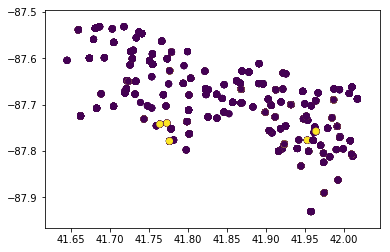

In [75]:
lat_long_dict = {'x':train[['Latitude']].values.flatten(), 
 'y':train[['Longitude']].values.flatten(), 
 'c':train[['WnvPresent']].values.flatten()}
plt.scatter(**d);

In [71]:
len(d['x'])

8610